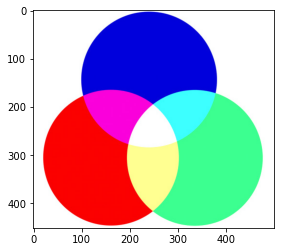

In [1]:
#programming_fever
import cv2
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#%matplotlib inline
img_path = "RGB.jpg"
img = cv2.imread(img_path)
imgplot = plt.imshow(np.real(img))
plt.show()


In [ ]:
img=cv2.resize(img,(700,500))

clicked = False
r = g = b = xpos = ypos = 0

#Reading csv file with pandas and giving names to each column
index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv('colors.csv', names=index, header=None)

#function to calculate minimum distance from all colors and get the most matching color
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

#function to get x,y coordinates of mouse double click
def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)
cv2.namedWindow('color detection by programming_fever')
cv2.setMouseCallback('color detection by programming_fever',draw_function)

while(1):

    cv2.imshow("color detection by programming_fever",img)
    if (clicked):
   
        #cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle 
        cv2.rectangle(img,(20,20), (750,60), (b,g,r), -1)

        #Creating text string to display( Color name and RGB values )
        text = getColorName(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)
        
        #cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(img, text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)

        #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(img, text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
        clicked=False

    if cv2.waitKey(20) & 0xFF ==27:
        break
    
cv2.destroyAllWindows()